# Module loading

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.0 MB/s eta 0:00:00


# Titanic 생존 예측

## Data Loaing

In [174]:
df = pd.read_csv('titanic.csv')
df.head()

,Unnamed: 0,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Name        889 non-null    object 
 3   Sex         889 non-null    object 
 4   Age         889 non-null    float64
 5   SibSp       889 non-null    int64  
 6   Parch       889 non-null    int64  
 7   Ticket      889 non-null    object 
 8   Embarked    889 non-null    object 
 9   Survived    889 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 69.6+ KB


In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,889.0,444.000000,256.776492,0.00,222.0,444.0,666.0,888.0
Pclass,889.0,2.311586,0.834700,1.00,2.0,3.0,3.0,3.0
Age,889.0,29.315152,12.984932,0.42,22.0,28.0,35.0,80.0
SibSp,889.0,0.524184,1.103705,0.00,0.0,0.0,1.0,8.0
Parch,889.0,0.382452,0.806761,0.00,0.0,0.0,0.0,6.0
Survived,889.0,0.382452,0.486260,0.00,0.0,0.0,1.0,1.0


In [74]:
df.corr()

,Unnamed: 0,Pclass,Age,SibSp,Parch,Survived
Unnamed: 0,1.000000,-0.035345,0.031321,-0.057692,-0.001663,-0.004997
Pclass,-0.035345,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,0.031321,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,-0.057692,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,-0.001663,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.004997,-0.335549,-0.069822,-0.034040,0.083151,1.000000


**각 컬럼별 상관관계 거의 없음**

## Preprocessing

In [75]:
df.columns

Index(['Unnamed: 0', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Embarked', 'Survived'],
      dtype='object')

In [76]:
print(df.Sex.value_counts())
print(df.Embarked.value_counts())

male      577
female    312
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [176]:
# 문자형인 'Sex', 'Embarked'를 숫자로 바꿈
df.Sex = [1 if i == 'male' else 2 for i in df.Sex]
df.Embarked = [1 if i == 'S' else 2 if i == 'C' else 3 for i in df.Embarked]

In [78]:
df.head()

,Unnamed: 0,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,2,1
2,2,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,1,1
3,3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,1,1
4,4,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,1,0


In [203]:
data = df[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].to_numpy()
target = df['Survived'].to_numpy()

In [80]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

### train / test 분리

In [204]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target,
                                                                      stratify=target, random_state=42)

In [179]:
train_input

array([[ 3.,  1., 28.,  0.,  0.,  3.],
       [ 2.,  1., 19.,  0.,  0.,  1.],
       [ 1.,  1., 49.,  1.,  0.,  2.],
       ...,
       [ 3.,  2., 48.,  1.,  3.,  1.],
       [ 1.,  1., 47.,  0.,  0.,  1.],
       [ 1.,  1., 48.,  1.,  0.,  1.]])

### scaling

In [205]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_input = ss.fit_transform(train_input)
test_input = ss.fit_transform(test_input)

## Modeling

### KNN

In [206]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# 학습
knn.fit(train_input, train_target)

# 점수
print(f'훈련데이터셋 점수: {knn.score(train_input, train_target):.4f}')

# 예측
knn_pred = knn.predict(test_input)

# 정확도
print(f'KNN 정확도: {accuracy_score(test_target, knn_pred):.4f}')

훈련데이터셋 점수: 0.8604
KNN 정확도: 0.7803


In [182]:
# 최적의 K 값
acc = []
for k in range(1, 100):
  knn.n_neighbors=k
  knn.fit(train_input, train_target)
  accuracy = knn.score(test_input, test_target)
  acc.append(accuracy)
  print(k, acc[k-1])

1 0.6636771300448431
2 0.7399103139013453
3 0.7533632286995515
4 0.7533632286995515
5 0.7802690582959642
6 0.7982062780269058
7 0.820627802690583
8 0.7982062780269058
9 0.7892376681614349
10 0.8026905829596412
11 0.7937219730941704
12 0.8026905829596412
13 0.7937219730941704
14 0.8026905829596412
15 0.8116591928251121
16 0.8071748878923767
17 0.8161434977578476
18 0.8116591928251121
19 0.8251121076233184
20 0.8161434977578476
21 0.7892376681614349
22 0.8071748878923767
23 0.7982062780269058
24 0.8026905829596412
25 0.7937219730941704
26 0.8026905829596412
27 0.8026905829596412
28 0.7982062780269058
29 0.7892376681614349
30 0.7937219730941704
31 0.7937219730941704
32 0.7937219730941704
33 0.7802690582959642
34 0.7757847533632287
35 0.7802690582959642
36 0.7802690582959642
37 0.7757847533632287
38 0.7802690582959642
39 0.7847533632286996
40 0.7847533632286996
41 0.7847533632286996
42 0.7892376681614349
43 0.7937219730941704
44 0.7892376681614349
45 0.7892376681614349
46 0.789237668161434

- k = 15일때 정확도가 가장 높음

In [183]:
knn = KNeighborsClassifier(n_neighbors=15)

# 학습
knn.fit(train_input, train_target)

# 점수
print(f'훈련데이터셋 점수: {knn.score(train_input, train_target):.4f}')

# 예측
knn_pred = knn.predict(test_input)

# 정확도
from sklearn.metrics import accuracy_score
print(f'KNN 정확도: {accuracy_score(test_target, knn_pred):.4f}')

훈련데이터셋 점수: 0.8363
KNN 정확도: 0.8117


### Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

# 학습
lr.fit(train_input, train_target)

# 점수
print(f'훈련데이터셋 점수: {lr.score(train_input, train_target):.4f}')

# 예측
lr_pred = lr.predict(test_input)

# 평가
print(f'LogisticRegression 정확도:{accuracy_score(test_target, lr_pred):.4f}')

훈련데이터셋 점수: 0.7943
LogisticRegression 정확도:0.7803


### Voting Classifier

In [186]:
from sklearn.ensemble import VotingClassifier
vo = VotingClassifier(estimators=[('LR', lr), ('KNN', knn)], voting='soft')

# 학습
vo.fit(train_input, train_target)

# 예측
pred = vo.predict(test_input)

# 정확도
from sklearn.metrics import accuracy_score
print('Voting 분류기 정확도:', accuracy_score(test_target, pred))

# 모델별 학습/예측/평가
models = [lr, knn]
for model in models:
  model.fit(train_input, train_target)
  pred = model.predict(test_input)
  model_name = model.__class__.__name__
  score = accuracy_score(test_target, pred)
  print(f'{model_name} 정확도: {score:.4f}')

Voting 분류기 정확도: 0.7937219730941704
LogisticRegression 정확도: 0.7803
KNeighborsClassifier 정확도: 0.8117


### Random Forest

In [207]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# 학습
rf.fit(train_input, train_target)

# 점수
print(f'훈련데이터셋 점수: {rf.score(train_input, train_target):.4f}')

# 예측
rf_pred = rf.predict(test_input)

# 평가
print(f'RandomForest 정확도: {accuracy_score(test_target, rf_pred):.4f}')

훈련데이터셋 점수: 0.9414
RandomForest 정확도: 0.7085


**과대적합**

#### 하이퍼파라미터 튜닝

In [208]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[10, 30, 50, 100],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}

model = RandomForestClassifier(n_jobs=-1, random_state=42)
gs = GridSearchCV(model, params, n_jobs= -1, cv=2)
gs.fit(train_input, train_target)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 30, 50, 100]})

In [209]:
gs.best_params_

{'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 30}

In [210]:
gs.best_score_

0.8258258258258258

In [211]:
# 최적 하이퍼파라미터로 학습된 모델로 예측 및 평가
best_rf = gs.best_estimator_

best_pred = best_rf.predict(test_input)
acc = accuracy_score(test_target, best_pred)

print(f'최적하이퍼파라미터 Random Forest 정확도: {acc:.4f}')
## 정확도가 하이퍼파라미터 튜닝 전보다 약 10% 상승함

최적하이퍼파라미터 Random Forest 정확도: 0.8072


### Decision Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# 학습
dt.fit(train_input, train_target)

# 점수
print(f'훈련데이터셋 점수: {dt.score(train_input, train_target):.4f}')

# 예측
dt_pred = dt.predict(test_input)

# 평가
print(f'DecisionTree 정확도:{accuracy_score(test_target, dt_pred):.4f}')

훈련데이터셋 점수: 0.9414
DecisionTree 정확도:0.6861


**테스트셋의 정확도가 너무 떨어짐**

#### 시각화

In [97]:
import graphviz

In [99]:
from sklearn.tree import export_graphviz

# 시각화 출력 파일 생성
export_graphviz(dt, out_file='titanic_tree.dot', class_names=['death', 'servived'],
                feature_names=['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
                impurity=True, filled=True)

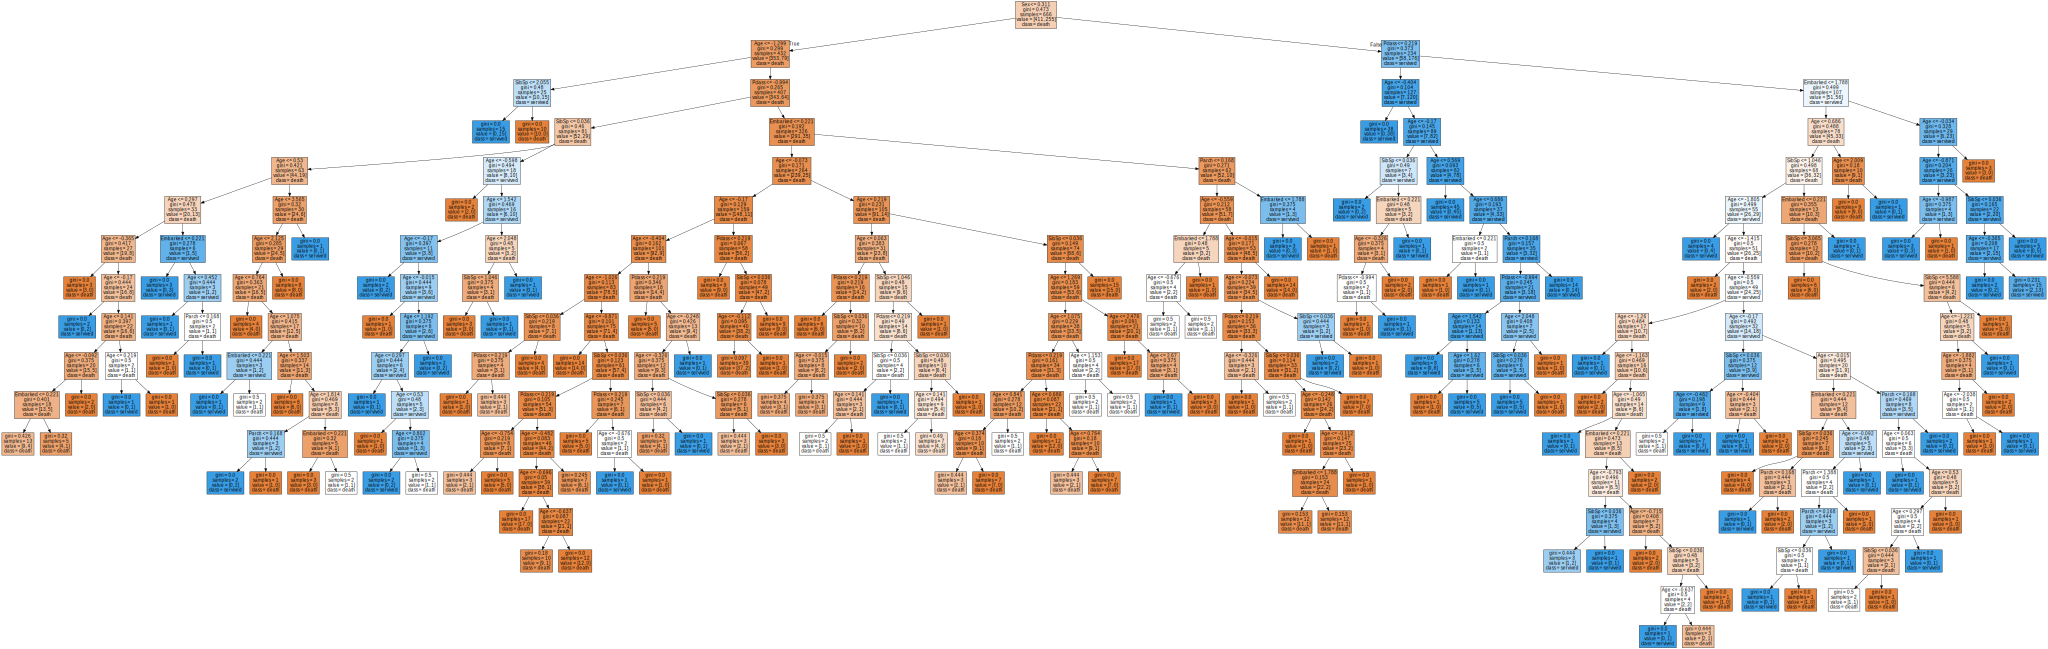

In [100]:
# 파일을 읽어와 그래프 띄우기
with open('titanic_tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

#### 피처별 중요도

In [102]:
dt.feature_importances_

array([0.12516965, 0.37435426, 0.299321  , 0.11245762, 0.03319562,
       0.05550185])

In [105]:
# 피처별 중요도
for name, value in zip(['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dt.feature_importances_):
  print('{0}:{1:.3f}'.format(name, value))

Pclass:0.125
Sex:0.374
Age:0.299
SibSp:0.112
Parch:0.033
Embarked:0.056


<Axes: >

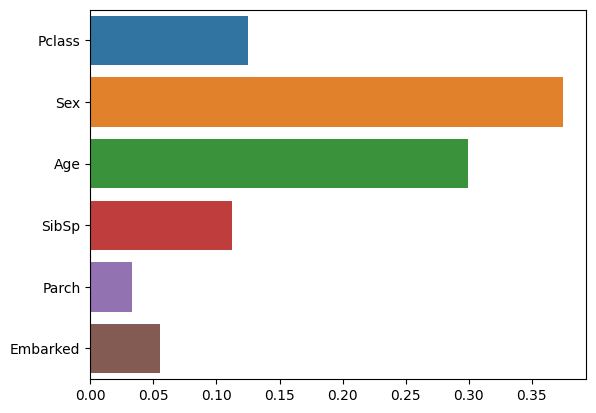

In [106]:
# 시각화
import seaborn as sns
sns.barplot(x=dt.feature_importances_, y=['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Embarked'])

## DecisionTree의 교차검증

### KFold 교차검증

In [88]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
## fit_time, score_time, test_score
print(scores)

{'fit_time': array([0.00834918, 0.00768805, 0.00276327, 0.00293708, 0.00259447]), 'score_time': array([0.00165224, 0.00183082, 0.00365615, 0.00126696, 0.00116777]), 'test_score': array([0.78358209, 0.7593985 , 0.77443609, 0.81203008, 0.76691729])}


In [89]:
np.mean(scores['test_score'])  # 평균 정확도: 77.78%

0.7792728088878913

## DecisionTree 최적 하이퍼파라미터

### 그리드서치

In [90]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[2, 3, 5, 10],
          'min_samples_split': [2, 3, 5, 10],
          'min_samples_leaf':[1, 5, 8]}

grid = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5)
grid.fit(train_input, train_target)

print(f'최적 하이퍼파라미터: {grid.best_params_}')
print(f'최고 정확도: {grid.best_score_}')

최적 하이퍼파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
최고 정확도: 0.8258332398159578


In [92]:
# 최적 하이퍼파라미터로 학습된 모델로 예측 및 평가
best_dt = grid.best_estimator_

best_pred = best_dt.predict(test_input)
acc = accuracy_score(test_target, best_pred)

print(f'최적하이퍼파라미터 DecisionTree 정확도: {acc:.4f}')
## 정확도가 하이퍼파라미터 튜닝 전보다 약 11% 상승함

최적하이퍼파라미터 DecisionTree 정확도: 0.7937


In [93]:
print(best_dt.score(train_input, train_target))
print(best_dt.score(test_input, test_target))

0.8423423423423423
0.7937219730941704


# Wine 등급 분류

## Dataset Loading

In [192]:
wine = pd.read_csv('wine_info.csv')
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [129]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [130]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [131]:
wine['class'].unique()

array([0, 1, 2])

In [145]:
wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

## Preprocessing

### 결측치 처리

In [193]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)
wine['nonflavanoid_phenols'].fillna(wine['nonflavanoid_phenols'].mean(), inplace=True)
wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

### 상관관계 높은 피처 선택

In [137]:
corr = wine.corr()
corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
alcohol,1.000000,0.104654,0.225250,-0.289776,0.277314,0.282087,0.226888,-0.154615,0.130710,0.554168,-0.080394,0.067406,0.639596,-0.315583
malic_acid,0.104654,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292423,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.225250,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186738,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.289776,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.362566,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.277314,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.248472,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.282087,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.446808,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.226888,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.535811,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.154615,0.292423,0.186738,0.362566,-0.248472,-0.446808,-0.535811,1.000000,-0.359954,0.135379,-0.263055,-0.499922,-0.311972,0.489813
proanthocyanins,0.130710,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.359954,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.554168,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.135379,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


**class와의 상관계수가 0.5 이상인 컬럼만 추출**

In [142]:
corr[abs(corr['class']) >= 0.5].index

Index(['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [194]:
data = wine[['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue',
            'od280/od315_of_diluted_wines','proline']].to_numpy()
target = wine['class'].to_numpy()

### train / test 분리

In [195]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target,
                                                                      stratify=target, random_state=42)

In [147]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(133, 6) (45, 6)
(133,) (45,)


## Modeling

### KNN

In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# 학습
knn.fit(train_input, train_target)

# 점수
print(f'훈련데이터셋 점수: {knn.score(train_input, train_target):.4f}')

# 예측
knn_pred = knn.predict(test_input)

# 정확도
print(f'KNN 정확도: {accuracy_score(test_target, knn_pred):.4f}')

훈련데이터셋 점수: 0.7669
KNN 정확도: 0.6667


In [197]:
# 최적의 K 값
acc = []
for k in range(1, 100):
  knn.n_neighbors=k
  knn.fit(train_input, train_target)
  accuracy = knn.score(test_input, test_target)
  acc.append(accuracy)
  print(k, acc[k-1])

1 0.6888888888888889
2 0.6444444444444445
3 0.6444444444444445
4 0.7111111111111111
5 0.6666666666666666
6 0.6444444444444445
7 0.6888888888888889
8 0.7333333333333333
9 0.6888888888888889
10 0.7555555555555555
11 0.7111111111111111
12 0.7333333333333333
13 0.6888888888888889
14 0.7777777777777778
15 0.7777777777777778
16 0.7777777777777778
17 0.7555555555555555
18 0.7555555555555555
19 0.7333333333333333
20 0.7555555555555555
21 0.7555555555555555
22 0.7555555555555555
23 0.7555555555555555
24 0.7333333333333333
25 0.7333333333333333
26 0.7333333333333333
27 0.7555555555555555
28 0.7111111111111111
29 0.7555555555555555
30 0.7111111111111111
31 0.7111111111111111
32 0.7111111111111111
33 0.7333333333333333
34 0.7111111111111111
35 0.6888888888888889
36 0.7333333333333333
37 0.7555555555555555
38 0.7333333333333333
39 0.7111111111111111
40 0.7111111111111111
41 0.7555555555555555
42 0.7333333333333333
43 0.7333333333333333
44 0.7333333333333333
45 0.7333333333333333
46 0.73333333333333

- k = 14일때 정확도가 가장 높음

In [198]:
knn = KNeighborsClassifier(n_neighbors=14)

# 학습
knn.fit(train_input, train_target)

# 점수
print(f'훈련데이터셋 점수: {knn.score(train_input, train_target):.4f}')

# 예측
knn_pred = knn.predict(test_input)

# 정확도
print(f'KNN 정확도: {accuracy_score(test_target, knn_pred):.4f}')

훈련데이터셋 점수: 0.7143
KNN 정확도: 0.7778


### Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

# 학습
lr.fit(train_input, train_target)

# 훈련셋 점수
print(f'훈련데이터셋 점수: {lr.score(train_input, train_target):.4f}')

# 예측
lr_pred = lr.predict(test_input)

# 정확도
print(f'LogisticRegression 정확도: {accuracy_score(test_target, lr_pred):.4f}')

훈련데이터셋 점수: 0.9173
LogisticRegression 정확도: 0.9778


**과소적합**

In [200]:
# 모델의 제약을 풀어주기 위한 규제 C 증가

lr100 = LogisticRegression(C=100).fit(train_input, train_target)
print(lr100.score(train_input, train_target))
print(lr100.score(test_input, test_target))

0.9473684210526315
0.9333333333333333


### Voting Classifier

In [201]:
from sklearn.ensemble import VotingClassifier
vo = VotingClassifier(estimators=[('LR', lr), ('KNN', knn)], voting='soft')

# 학습
vo.fit(train_input, train_target)

# 예측
pred = vo.predict(test_input)

# 정확도
from sklearn.metrics import accuracy_score
print('Voting 분류기 정확도:', accuracy_score(test_target, pred))

# 모델별 학습/예측/평가
models = [lr, knn]
for model in models:
  model.fit(train_input, train_target)
  pred = model.predict(test_input)
  model_name = model.__class__.__name__
  score = accuracy_score(test_target, pred)
  print(f'{model_name} 정확도: {score:.4f}')

Voting 분류기 정확도: 0.9555555555555556
LogisticRegression 정확도: 0.9778
KNeighborsClassifier 정확도: 0.7778


### Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# 학습
dt.fit(train_input, train_target)

# 훈련셋 점수
print(f'훈련데이터셋 점수: {dt.score(train_input, train_target):.4f}')

# 예측
dt_pred = dt.predict(test_input)

# 정확도
print(f'Decision Tree 정확도: {accuracy_score(test_target, dt_pred):.4f}')

훈련데이터셋 점수: 1.0000
Decision Tree 정확도: 0.9556


#### 시각화

In [159]:
# 시각화 출력 파일 생성
export_graphviz(dt, out_file='wine_tree.dot', class_names=['class 0', 'class 1', 'class 2'],
                feature_names=['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue',
            'od280/od315_of_diluted_wines','proline'],
                impurity=True, filled=True)

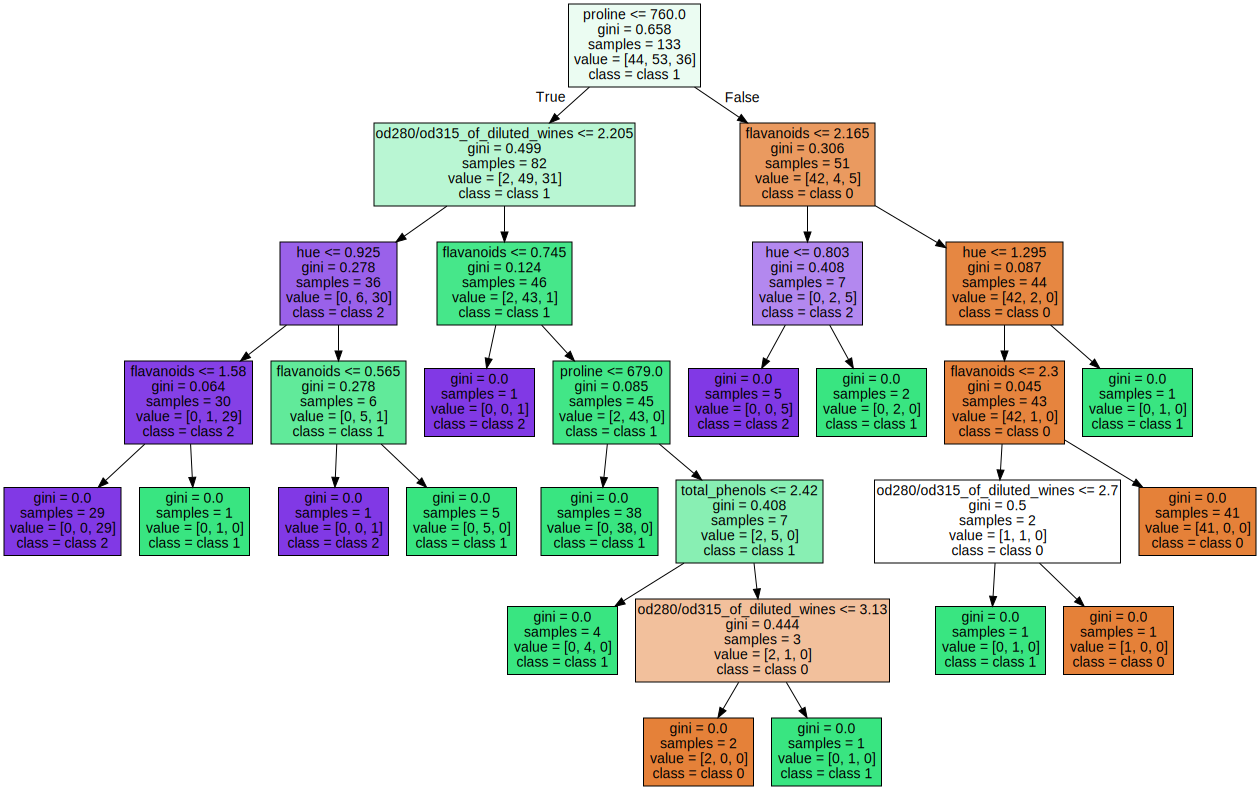

In [160]:
# 파일을 읽어와 그래프 띄우기
with open('wine_tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

#### 피처별 중요도

In [161]:
dt.feature_importances_

array([0.        , 0.01739927, 0.17537818, 0.12699212, 0.3150175 ,
       0.36521293])

In [162]:
# 피처별 중요도
for name, value in zip(['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue',
            'od280/od315_of_diluted_wines','proline'], dt.feature_importances_):
  print('{0}:{1:.3f}'.format(name, value))

alcalinity_of_ash:0.000
total_phenols:0.017
flavanoids:0.175
hue:0.127
od280/od315_of_diluted_wines:0.315
proline:0.365


<Axes: >

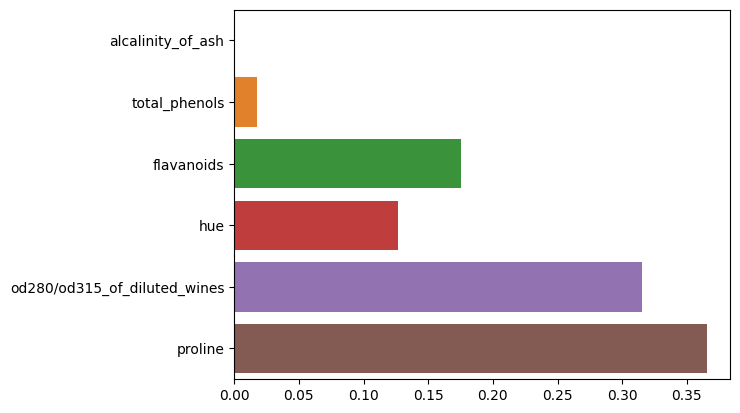

In [163]:
# 시각화
import seaborn as sns
sns.barplot(x=dt.feature_importances_, y=['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue',
            'od280/od315_of_diluted_wines','proline'])

In [164]:
corr[abs(corr['class']) >= 0.5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
alcalinity_of_ash,-0.289776,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.362566,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
total_phenols,0.282087,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.446808,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.226888,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.535811,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
hue,-0.080394,-0.561296,-0.074667,-0.273955,0.055398,0.433681,0.543479,-0.263055,0.295544,-0.521813,1.000000,0.565468,0.236183,-0.617369
od280/od315_of_diluted_wines,0.067406,-0.368710,0.003911,-0.276769,0.066004,0.699949,0.787194,-0.499922,0.519067,-0.428815,0.565468,1.000000,0.312761,-0.788230
proline,0.639596,-0.192011,0.223626,-0.440597,0.393351,0.498115,0.494193,-0.311972,0.330417,0.316100,0.236183,0.312761,1.000000,-0.633717
class,-0.315583,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489813,-0.499130,0.265668,-0.617369,-0.788230,-0.633717,1.000000


**class와의 상관관계가 높다고해서 피처의 중요도 역시 높은 것은 아님을 알 수 있다.**

## DecisionTree의 교차검증

### KFold 교차검증

In [165]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
## fit_time, score_time, test_score
print(scores)

{'fit_time': array([0.00233531, 0.00527787, 0.00195789, 0.00206566, 0.00705242]), 'score_time': array([0.00637293, 0.00632453, 0.00823498, 0.00101137, 0.00101471]), 'test_score': array([1.        , 0.88888889, 0.7037037 , 0.96153846, 0.84615385])}


In [166]:
np.mean(scores['test_score'])  # 평균 정확도: 88.01%

0.88005698005698

## DecisionTree 최적 하이퍼파라미터

### 그리드서치

In [167]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[2, 3, 5, 10],
          'min_samples_split': [2, 3, 5, 10],
          'min_samples_leaf':[1, 5, 8]}

grid = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5)
grid.fit(train_input, train_target)

print(f'최적 하이퍼파라미터: {grid.best_params_}')
print(f'최고 정확도: {grid.best_score_}')

최적 하이퍼파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
최고 정확도: 0.8948717948717949


In [168]:
# 최적 하이퍼파라미터로 학습된 모델로 예측 및 평가
best_dt = grid.best_estimator_

best_pred = best_dt.predict(test_input)
acc = accuracy_score(test_target, best_pred)

print(f'최적하이퍼파라미터 DecisionTree 정확도: {acc:.4f}')
## 정확도가 하이퍼파라미터 튜닝 전보다 약 2% 상승함

최적하이퍼파라미터 DecisionTree 정확도: 0.9778


In [169]:
print(best_dt.score(train_input, train_target))
print(best_dt.score(test_input, test_target))

0.9849624060150376
0.9777777777777777


### Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# 학습
rf.fit(train_input, train_target)

# 훈련셋 점수
print(f'훈련데이터셋 점수: {rf.score(train_input, train_target):.4f}')

# 예측
rf_pred = rf.predict(test_input)

# 정확도
print(f'Random Forest 정확도: {accuracy_score(test_target, rf_pred):.4f}')

훈련데이터셋 점수: 1.0000
Random Forest 정확도: 0.9556


**과대적합**